In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)

zerg_data = read_csv('../Output/ZergMarch.csv', header=0, index_col=False)
demoZ = read_csv('../Output/wedDemoZerg.csv', header=0, index_col=False)
display(demoZ)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win
0,273,Eternal Empire LE,us,926,Z,P,0.0,1,0,Player 2 - Scarlett (Zerg),12,12.0,14,50,0,0,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,273,Eternal Empire LE,us,926,Z,P,166.6,480,30,Player 2 - Scarlett (Zerg),13,14.0,14,50,699,150,1100,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,273,Eternal Empire LE,us,926,Z,P,154.0,960,60,Player 2 - Scarlett (Zerg),15,16.0,22,235,811,50,1300,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,273,Eternal Empire LE,us,926,Z,P,280.0,1440,90,Player 2 - Scarlett (Zerg),16,18.0,22,90,867,450,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,273,Eternal Empire LE,us,926,Z,P,313.6,1920,120,Player 2 - Scarlett (Zerg),16,18.0,22,75,895,775,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0
5,273,Eternal Empire LE,us,926,Z,P,389.2,2400,150,Player 2 - Scarlett (Zerg),19,20.0,22,275,867,650,1575,0,0,36,156,0,0,0,0,0,0,0,0,0,21,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0
6,273,Eternal Empire LE,us,926,Z,P,145.6,2880,180,Player 2 - Scarlett (Zerg),21,26.0,28,100,895,450,2275,0,0,92,156,0,0,0,0,0,0,0,0,0,21,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0
7,273,Eternal Empire LE,us,926,Z,P,127.4,3360,210,Player 2 - Scarlett (Zerg),22,30.0,36,185,1119,450,2475,50,0,4,0,0,0,0,0,0,0,0,0,0,22,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,2,0
8,273,Eternal Empire LE,us,926,Z,P,128.8,3840,240,Player 2 - Scarlett (Zerg),25,32.0,36,110,1399,550,2925,350,0,4,0,0,0,0,0,0,0,0,0,0,26,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,3,2,0,0,1,0,0,0,0,0,0,0,2,0
9,273,Eternal Empire LE,us,926,Z,P,148.4,4320,270,Player 2 - Scarlett (Zerg),28,42.0,44,90,1483,800,3225,400,0,8,22,0,0,0,0,0,0,0,0,0,29,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,4,2,0,0,1,0,0,0,0,0,0,0,4,0


In [2]:
new_data = pd.concat([zerg_data.reset_index(drop=True), demoZ.reset_index(drop=True)], axis=0, ignore_index=True)
display(new_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win
0,0,Acropolis LE,us,551,Z,Z,0.0,1,0,Player 1 - soO (Zerg),12,12.0,14,50,0,0,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,Acropolis LE,us,551,Z,Z,266.0,480,30,Player 1 - soO (Zerg),13,14.0,14,55,755,150,1100,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,Acropolis LE,us,551,Z,Z,210.0,960,60,Player 1 - soO (Zerg),14,16.0,22,240,839,100,1250,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,Acropolis LE,us,551,Z,Z,176.4,1440,90,Player 1 - soO (Zerg),16,18.0,22,90,867,450,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,Acropolis LE,us,551,Z,Z,179.2,1920,120,Player 1 - soO (Zerg),16,18.0,22,95,923,775,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81321,273,Eternal Empire LE,us,926,Z,P,168.0,18720,1170,Player 2 - Scarlett (Zerg),62,176.0,178,645,2043,1175,12325,3575,14150,127,873,475,2950,2075,3650,0,0,0,0,0,63,0,1,0,7,4,2,0,0,1,0,0,24,0,1,1,23,3,24,1,1,0,1,2,12,0,0,0,0,0
81322,273,Eternal Empire LE,us,926,Z,P,222.6,19200,1200,Player 2 - Scarlett (Zerg),62,158.0,194,905,2043,800,12050,3475,15250,293,918,150,2475,1775,4600,0,0,0,0,0,63,0,1,0,7,4,2,0,0,1,0,0,0,0,1,0,25,3,28,1,1,0,1,2,12,0,0,0,0,0
81323,273,Eternal Empire LE,us,926,Z,P,194.6,19680,1230,Player 2 - Scarlett (Zerg),62,149.0,194,735,1819,825,11575,2825,16225,76,873,375,2225,1425,5150,0,0,0,0,0,63,0,1,0,7,4,2,0,0,1,0,0,0,0,1,0,25,3,28,1,1,0,1,1,12,0,0,0,0,0
81324,273,Eternal Empire LE,us,926,Z,P,68.6,20160,1260,Player 2 - Scarlett (Zerg),61,154.0,200,710,1539,375,12125,3375,17025,188,895,125,2575,1875,5250,0,0,0,0,0,61,0,1,0,7,4,2,0,0,1,0,0,0,0,1,0,25,2,30,1,1,0,1,1,12,0,0,0,6,0


In [3]:
#Training and validation data set
from sklearn.preprocessing import MinMaxScaler

no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(new_data) if x not in no_normalize]

#Normalizing these columns
norm = new_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
zerg_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=new_data.index)

#One-hot Encoding the categorical variables
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(new_data['map_name'], prefix='Map'))
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(new_data['region'], prefix='Region'))
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(new_data['enemy_race'], prefix='Enemy'))

#Displaying first and last 5 rows
display(zerg_data_normalized.head(5), zerg_data_normalized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win,Map_Acropolis LE,Map_Aura de mort EC,Map_Automaton LE,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Piliers d'or EC,Map_Pillars of Gold LE,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Sous-marin EC,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
0,0.000000,0.111111,0.049020,0.000000,0.003451,0.000000,0.000000,0.003711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.144158,0.120370,0.058824,0.000000,0.003796,0.164452,0.027397,0.005566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120370,0.0,0.0,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0.113809,0.129630,0.068627,0.024096,0.016563,0.182749,0.018265,0.011132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129630,0.0,0.0,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.095599,0.148148,0.078431,0.024096,0.006211,0.188848,0.082192,0.014842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157407,0.0,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.097117,0.148148,0.078431,0.024096,0.006556,0.201046,0.141553,0.014842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175926,0.0,0.0,0.0,0.055556,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win,Map_Acropolis LE,Map_Aura de mort EC,Map_Automaton LE,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Piliers d'or EC,Map_Pillars of Gold LE,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Sous-marin EC,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
81321,0.091047,0.574074,0.852941,0.493976,0.044513,0.445001,0.214612,0.422078,0.262868,0.212325,0.014814,0.336028,0.128378,0.259912,0.197619,0.149768,0.0,0.0,0.0,0.0,0.0,0.583333,0.0,0.1,0.0,0.388889,0.4,0.333333,0.0,0.0,0.5,0.0,0.0,0.461538,0.0,0.5,0.125,0.448980,0.1875,0.266667,0.5,0.5,0.0,0.333333,0.030303,0.315789,0.0,0.0,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
81322,0.120637,0.574074,0.764706,0.542169,0.062457,0.445001,0.146119,0.411874,0.255515,0.228831,0.034177,0.353349,0.040541,0.218062,0.169048,0.188749,0.0,0.0,0.0,0.0,0.0,0.583333,0.0,0.1,0.0,0.388889,0.4,0.333333,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.5,0.000,0.489796,0.1875,0.311111,0.5,0.5,0.0,0.333333,0.030303,0.315789,0.0,0.0,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
81323,0.105463,0.574074,0.720588,0.542169,0.050725,0.396210,0.150685,0.394249,0.207721,0.243461,0.008865,0.336028,0.101351,0.196035,0.135714,0.211317,0.0,0.0,0.0,0.0,0.0,0.583333,0.0,0.1,0.0,0.388889,0.4,0.333333,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.5,0.000,0.489796,0.1875,0.311111,0.5,0.5,0.0,0.333333,0.015152,0.315789,0.0,0.0,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
81324,0.037178,0.564815,0.745098,0.560241,0.048999,0.335221,0.068493,0.414657,0.248162,0.255466,0.021929,0.344496,0.033784,0.226872,0.178571,0.215420,0.0,0.0,0.0,0.0,0.0,0.564815,0.0,0.1,0.0,0.388889,0.4,0.333333,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.5,0.000,0.489796,0.1250,0.333333,0.5,0.5,0.0,0.333333,0.015152,0.315789,0.0,0.0,0.0,0.035088,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
81325,0.000000,0.555556,0.563725,0.463855,0.005866,0.097364,0.173516,0.316327,0.117647,0.300107,0.006532,0.275597,0.108108,0.121145,0.088095,0.269788,0.0,0.0,0.0,0.0,0.0,0.564815,0.0,0.1,0.0,0.333333,0.4,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.000,0.408163,0.0000,0.300000,0.5,0.5,0.0,0.333333,0.015152,0.078947,0.0,0.0,0.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,0

In [4]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(zerg_data_normalized) if x not in no_X]

Y = zerg_data_normalized['win']
X_normalized = zerg_data_normalized[yes_X]

In [6]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(zerg_data)
num_val = int(val_split * num_data)
num_train = int(train_split * num_data)
num_test = len(demoZ)

Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)+1]
Y_test = Y[(num_val + num_train)+1:]


X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)+1]
X_normalized_test = X_normalized[(num_val + num_train)+1:]

In [7]:
Y_test = pd.DataFrame(Y_test)
Y_val = pd.DataFrame(Y_val)
Y_train = pd.DataFrame(Y_train)

In [8]:
Y_train = Y_train.values.reshape((-1,1))
Y_val = Y_val.values.reshape((-1,1))
Y_test = Y_test.values.reshape((-1,1))

In [9]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(65025, 1)
(16257, 1)
(44, 1)


In [10]:
print(X_normalized_train.shape)
print(X_normalized_val.shape)
print(X_normalized_test.shape)

(65025, 115)
(16257, 115)
(44, 115)


In [11]:
win_length = 1
batch_size = 32
num_features = len(yes_X)
train_generator = TimeseriesGenerator(X_normalized_train, Y_train, length = win_length,
                                     sampling_rate=1, batch_size = batch_size)
val_generator = TimeseriesGenerator(X_normalized_val, Y_val, length = win_length,
                                     sampling_rate=1, batch_size = batch_size)
test_generator = TimeseriesGenerator(X_normalized_test, Y_test, length = win_length,
                                     sampling_rate=1, batch_size = batch_size)

In [12]:
val_performance = {}
performance = {}

Y_Time = []
timer = 21;
for i in range(0,len(Y_test)-1):
    Y_Time.append(timer)
    timer += 21
    
Y_demo_test = Y_test[1:]

In [13]:
#DENSE MODEL

dense_model = tf.keras.Sequential()
dense_model.add(tf.keras.layers.Dense(units=123, activation='sigmoid', input_shape=(win_length, num_features)))
dense_model.add(tf.keras.layers.Dense(units=62, activation='sigmoid'))
dense_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_dense = dense_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Dense'] = dense_model.evaluate(val_generator)
performance['Dense'] = dense_model.evaluate(test_generator, verbose=0)

Epoch 1/100
2032/2032 [==============================] - 18s 9ms/step - loss: 0.7073 - binary_accuracy: 0.5167 - precision: 0.5150 - recall: 0.4746 - auc: 0.5282 - val_loss: 0.6875 - val_binary_accuracy: 0.5528 - val_precision: 0.6138 - val_recall: 0.4933 - val_auc: 0.5733
Epoch 2/100
2032/2032 [==============================] - 17s 9ms/step - loss: 0.6931 - binary_accuracy: 0.5303 - precision: 0.5296 - recall: 0.4934 - auc: 0.5473 - val_loss: 0.6874 - val_binary_accuracy: 0.5439 - val_precision: 0.6435 - val_recall: 0.3737 - val_auc: 0.5893A: 0s - loss: 0.6932 - binary_accuracy: 0.5292 - precision: 0.5305 - re
Epoch 3/100
2032/2032 [==============================] - 17s 9ms/step - loss: 0.6855 - binary_accuracy: 0.5462 - precision: 0.5480 - recall: 0.4978 - auc: 0.5693 - val_loss: 0.6861 - val_binary_accuracy: 0.5403 - val_precision: 0.6455 - val_recall: 0.3551 - val_auc: 0.60030.6844 - binary_accuracy: 0.5498 - precision: 0.5562 - recall: 0.5290 - auc: 0. - ETA: 2s - loss: 0.6843 - b

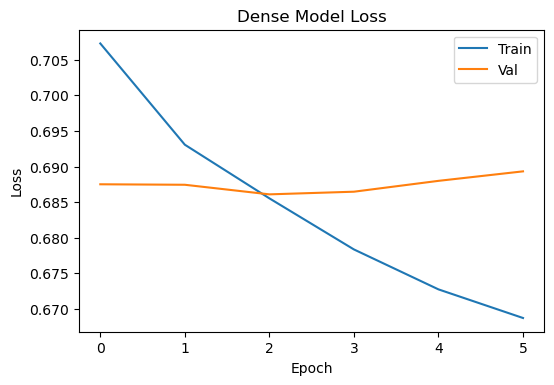

In [14]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [24]:
dense_pred = dense_model.predict(test_generator)
dense_pred = pd.Series(dense_pred.flatten())

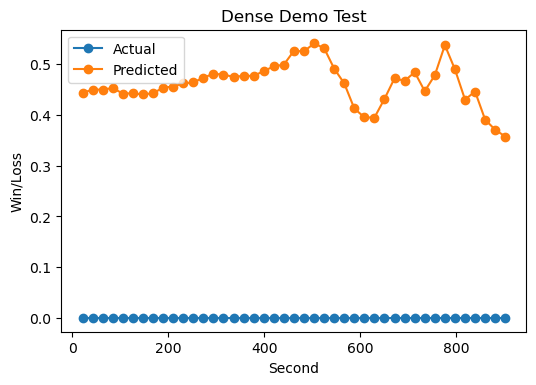

In [16]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, dense_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('Dense Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [17]:
#SIMPLE RNN MODEL

simple_model = tf.keras.Sequential()
simple_model.add(tf.keras.layers.SimpleRNN(units=123, activation='sigmoid', return_sequences=True, input_shape=(win_length, num_features)))
simple_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

simple_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_simple = simple_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Simple'] = simple_model.evaluate(val_generator)
performance['Simple'] = simple_model.evaluate(test_generator, verbose=0)

Epoch 1/100
2032/2032 [==============================] - 18s 9ms/step - loss: 0.7004 - binary_accuracy: 0.5302 - precision_1: 0.5288 - recall_1: 0.5042 - auc_1: 0.5412 - val_loss: 0.6833 - val_binary_accuracy: 0.5575 - val_precision_1: 0.6300 - val_recall_1: 0.4641 - val_auc_1: 0.5967. - ETA: 1s - loss: 0.7000 - binary_accuracy: 0.5297 - precision_1: 0.5328 - recall_1: 0.5301 - ETA: 1s - loss: 0.6994 - binary_accuracy: 0.5326 - precisio
Epoch 2/100
2032/2032 [==============================] - 17s 9ms/step - loss: 0.6880 - binary_accuracy: 0.5520 - precision_1: 0.5523 - recall_1: 0.5216 - auc_1: 0.5753 - val_loss: 0.6838 - val_binary_accuracy: 0.5563 - val_precision_1: 0.6265 - val_recall_1: 0.4690 - val_auc_1: 0.5972nary_accuracy: - ETA: 0s - loss: 0.6880 - binary_accuracy: 0.5508 - precision_1: 0.5514 - recall_1: 0.5239 - auc
Epoch 3/100
2032/2032 [==============================] - 17s 9ms/step - loss: 0.6823 - binary_accuracy: 0.5626 - precision_1: 0.5627 - recall_1: 0.5384 - auc_1: 

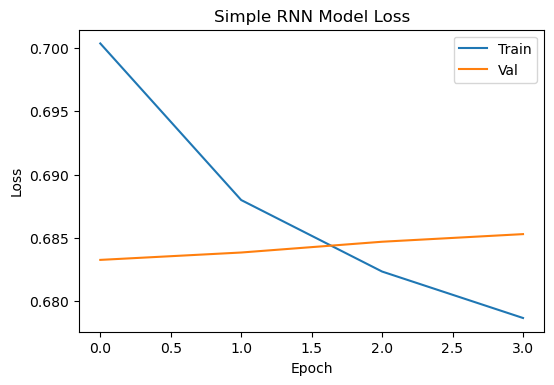

In [18]:
#Simple RNN Model Loss
plt.plot(history_simple.history['loss'])
plt.plot(history_simple.history['val_loss'])
plt.title('Simple RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [25]:
simple_pred = simple_model.predict(test_generator)
simple_pred = pd.Series(simple_pred.flatten())

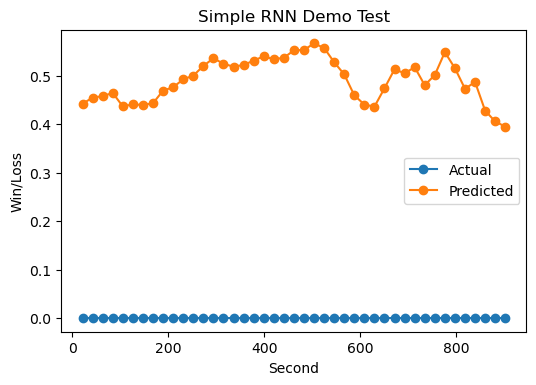

In [20]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, simple_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('Simple RNN Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [21]:
#LSTM MODEL
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
lstm_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_lstm = lstm_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['LSTM'] = lstm_model.evaluate(val_generator)
performance['LSTM'] = lstm_model.evaluate(test_generator, verbose=0)

Epoch 1/100
2032/2032 [==============================] - 19s 9ms/step - loss: 0.6913 - binary_accuracy: 0.5290 - precision_2: 0.5294 - recall_2: 0.4736 - auc_2: 0.5371 - val_loss: 0.6905 - val_binary_accuracy: 0.5201 - val_precision_2: 0.6303 - val_recall_2: 0.2977 - val_auc_2: 0.5871 precision_2: 0.5286 - recall_2: 0.4788 - auc
Epoch 2/100
2032/2032 [==============================] - 18s 9ms/step - loss: 0.6794 - binary_accuracy: 0.5550 - precision_2: 0.5624 - recall_2: 0.4722 - auc_2: 0.5841 - val_loss: 0.6874 - val_binary_accuracy: 0.5333 - val_precision_2: 0.6300 - val_recall_2: 0.3567 - val_auc_2: 0.5904ary_accuracy: 0.5495 - precision_2: 0.5776 - recall_2: 0.4583 - auc_2 - ETA: 10s - loss: 0.6830 - binary_accuracy: 0.5461 - precision_2: 0.5560 - recall_2: 0.4883 -  - ETA: 10s - loss: 0.6807 - binary_accuracy: 0.5608 - precision_2: 0 - ETA: 9s - loss: 0.6791 - bi - ETA: 6s - loss: 0.6749 - binary_accuracy: 0.5677 - prec - ETA: 5s -
Epoch 3/100
2032/2032 [==========================

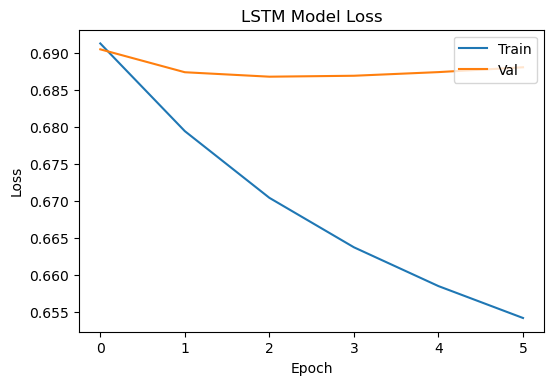

In [26]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [27]:
lstm_pred = lstm_model.predict(test_generator)
lstm_pred = pd.Series(lstm_pred.flatten())

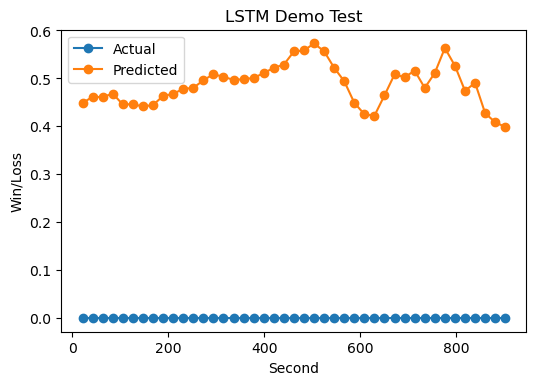

In [28]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, lstm_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('LSTM Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [29]:
#GRU MODEL

gru_model = tf.keras.models.Sequential()
gru_model.add(tf.keras.layers.GRU(32, return_sequences=True, input_shape=(win_length, num_features)))
gru_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

gru_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_gru = gru_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['GRU'] = gru_model.evaluate(val_generator)
performance['GRU'] = gru_model.evaluate(test_generator, verbose=0)

Epoch 1/100
2032/2032 [==============================] - 18s 9ms/step - loss: 0.6908 - binary_accuracy: 0.5315 - precision_3: 0.5315 - recall_3: 0.4852 - auc_3: 0.5441 - val_loss: 0.6890 - val_binary_accuracy: 0.5267 - val_precision_3: 0.6274 - val_recall_3: 0.3330 - val_auc_3: 0.591049 - binary_accuracy: 0.5235 - precision_3: 0.5328 - recall_3: 0.4583 - auc_3: 0. - ETA: 13s - l
Epoch 2/100
2032/2032 [==============================] - 17s 9ms/step - loss: 0.6792 - binary_accuracy: 0.5569 - precision_3: 0.5614 - recall_3: 0.4960 - auc_3: 0.5853 - val_loss: 0.6865 - val_binary_accuracy: 0.5407 - val_precision_3: 0.6270 - val_recall_3: 0.3971 - val_auc_3: 0.5917
Epoch 3/100
2032/2032 [==============================] - 18s 9ms/step - loss: 0.6720 - binary_accuracy: 0.5675 - precision_3: 0.5706 - recall_3: 0.5247 - auc_3: 0.6050 - val_loss: 0.6858 - val_binary_accuracy: 0.5453 - val_precision_3: 0.6236 - val_recall_3: 0.4268 - val_auc_3: 0.59215702 - precision_3: 0.5768 - recall_3: 0.5389 -

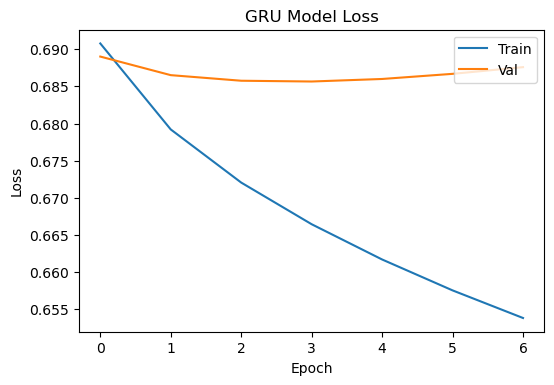

In [30]:
#GRU Model Loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [31]:
gru_pred = gru_model.predict(test_generator)
gru_pred = pd.Series(gru_pred.flatten())

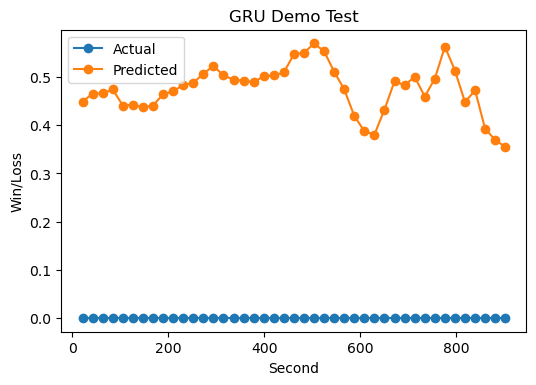

In [32]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, gru_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('GRU Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

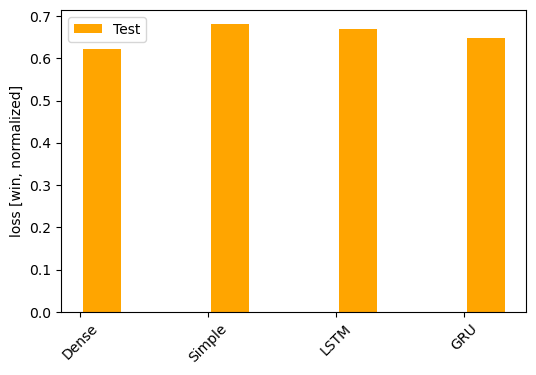

In [33]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, normalized]')
plt.bar(x + 0.17, test_loss, width, label='Test', color='orange')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

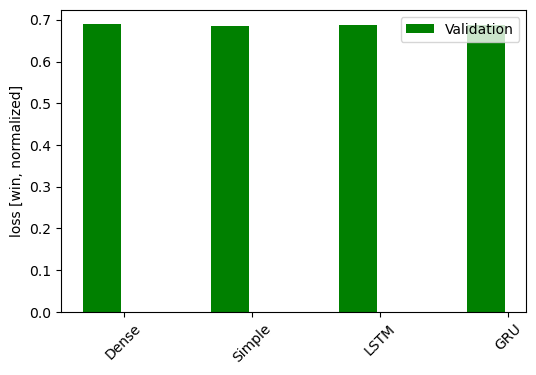

In [34]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]

plt.ylabel('loss [win, normalized]')
plt.bar(x - 0.17, val_loss, width, label='Validation', color='green')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()